In [29]:
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import re
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Function to read data from a text file and create a DataFrame
def read_data_from_file(file_path):
    extracted_data = []

    # Open the file and read lines
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        lines = file.readlines()

        for line in lines:  
            line = line.replace('\t',' ')          
            parts = line.strip().split(' ', 3)  

            try:
                if len(parts) == 4:  
                    month = parts[0]
                    day = int(parts[1])
                    year = int(parts[2])
                    text = parts[3].strip()  
                    extracted_data.append({
                        'Month': month,
                        'Day': day,
                        'Year': year,
                        'Text': text
                    })
            except ValueError:
                continue

    # Create a DataFrame
    df = pd.DataFrame(extracted_data)
    return df

file_path = 'reviews_data.txt'  
df = read_data_from_file(file_path)

In [3]:
df.head(5)

Month  Day  Year                                               Text
0   Oct   12  2009  Nice trendy hotel location not too bad. I stay...
1   Sep   25  2009  Great Budget Hotel! Stayed two nights at Aloft...
2   Aug    4  2009  Excellent value - location not a big problem. ...
3   Jul   17  2009  Stylish clean reasonable value poor location I...
4   May   30  2009  Remote but excellent value for money Stayed th...

In [4]:
df['Month'].unique()

array(['Oct', 'Sep', 'Aug', 'Jul', 'May', 'Dec', 'Nov', 'Jun', 'Apr',
       'Mar', 'Jan', 'Feb', '5\x03j_S={\x00@\x07\x00Sep'], dtype=object)

In [5]:
df['Month'].value_counts()

Month
Oct               28535
Aug               27084
Jul               25855
Sep               24368
Nov               22916
Jun               21747
May               20349
Apr               19874
Mar               18248
Jan               16929
Feb               14367
Dec               12712
5j_S={ @ Sep        1
Name: count, dtype: int64

In [6]:
res = df['Year'].unique()
res.sort()
res

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

In [7]:
res = df['Day'].unique()
res.sort()
res

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [8]:
# Drop rows where the Month is the weird string
weird_string = '5\x03j_S={\x00@\x07\x00Sep'
df_cleaned = df[df['Month'] != weird_string]

In [9]:
df_cleaned['Month'].value_counts()

Month
Oct    28535
Aug    27084
Jul    25855
Sep    24368
Nov    22916
Jun    21747
May    20349
Apr    19874
Mar    18248
Jan    16929
Feb    14367
Dec    12712
Name: count, dtype: int64

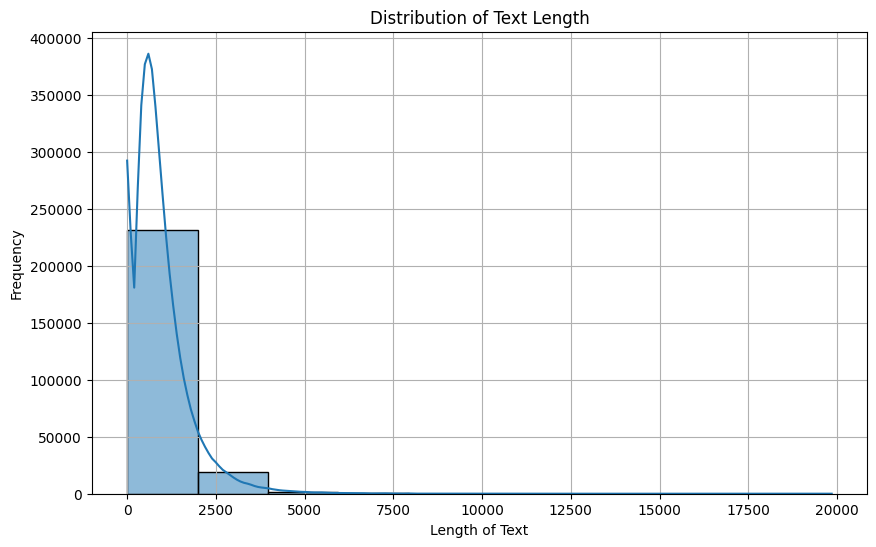

In [10]:
# Calculate the length of each text entry
df['Text Length'] = df['Text'].str.len()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Text Length'], bins=10, kde=True)  # Use kde=True for a density plot
plt.title('Distribution of Text Length')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
df.describe()

Day           Year    Text Length
count  252985.000000  252985.000000  252985.000000
mean       15.766872    2007.362018     927.396933
std         8.835265       1.680957     816.561040
min         1.000000    2001.000000       1.000000
25%         8.000000    2006.000000     420.000000
50%        16.000000    2008.000000     749.000000
75%        23.000000    2009.000000    1215.000000
max        31.000000    2009.000000   19850.000000

In [12]:
documents = list(df_cleaned['Text'])
documents

["Nice trendy hotel location not too bad. I stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Beijing, then you

In [13]:
# Function to remove all non-alphabetic characters
def clean_sentence(sentence):
    # Remove all non-alphabetic characters and convert the text to lowercase
    return re.sub(r'[^a-zA-Z\s]', '', sentence).lower()

# Apply the function to each sentence in the list
cleaned_sentences = [clean_sentence(sentence) for sentence in documents]

In [14]:
documents = cleaned_sentences
documents

['nice trendy hotel location not too bad i stayed in this hotel for one night as this is a fairly new place some of the taxi drivers did not know where it was andor did not want to drive there once i have eventually arrived at the hotel i was very pleasantly surprised with the decor of the lobbyground floor area it was very stylish and modern i found the receptions staff geeting me with aloha a bit out of place but i guess they are briefed to say that to keep up the coroporate imageas i have a starwood preferred guest member i was given a small gift uponcheck in it was only a couple of fridge magnets in a gift box but nevertheless a nice gesturemy room was nice and roomy there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by blissthe location is not great it is at the last metro stop and you then need to take a taxi but if you are not planning on going to see the historic sites in beijing then you will be oki chose to hav

In [15]:
words = [sentence.lower().split(' ') for sentence in documents]

In [16]:
len(words)

252984

In [17]:
model = gensim.models.Word2Vec(
    words
    , vector_size=50
    , window=5
    , min_count=1
    , workers=6    
)

# Build the vocabulary
model.build_vocab(words)

model.train(words,total_examples=len(words),epochs=2)

(61248811, 85776972)

In [18]:
vocab_words = list(model.wv.key_to_index.keys())
print(vocab_words)

['the', 'and', 'a', 'to', 'was', 'in', '', 'i', 'we', 'of', 'hotel', 'for', 'is', 'it', 'room', 'at', 'but', 'were', 'on', 'with', 'you', 'very', 'this', 'that', 'not', 'had', 'there', 'our', 'are', 'have', 'as', 'great', 'from', 'my', 'stay', 'they', 'be', 'good', 'so', 'all', 'staff', 'would', 'location', 'if', 'rooms', 'one', 'which', 'stayed', 'nice', 'no', 'an', 'us', 'just', 'clean', 'out', 'when', 'only', 'night', 'breakfast', 'or', 'about', 'get', 'service', 'up', 'its', 'time', 'also', 'by', 'small', 'here', 'again', 'place', 'could', 'like', 'other', 'bed', 'me', 'some', 'did', 'really', 'more', 'day', 'well', 'bathroom', 'can', 'your', 'than', 'will', 'friendly', 'back', 'floor', 'after', 'what', 'two', 'hotels', 'didnt', 'london', 'walk', 'even', 'comfortable', 'area', 'go', 'excellent', 'got', 'been', 'price', 'much', 'helpful', 'desk', 'little', 'street', 'do', 'new', 'first', 'has', 'nights', 'next', 'around', 'dont', 'front', 'food', 'booked', 'free', 'their', 'too', 'a

In [21]:
model.wv.most_similar('street', topn= 10)

[('road', 0.9287647604942322),
 ('rue', 0.6906585097312927),
 ('streets', 0.6827484965324402),
 ('avenue', 0.659426212310791),
 ('strip', 0.6562902927398682),
 ('hall', 0.6524983048439026),
 ('ave', 0.6473497152328491),
 ('river', 0.6236144304275513),
 ('side', 0.617658793926239),
 ('st', 0.6075047850608826)]

In [22]:
model.wv.most_similar('good', topn= 10)

[('decent', 0.899561882019043),
 ('great', 0.8980641961097717),
 ('nice', 0.7954821586608887),
 ('reasonable', 0.7767438888549805),
 ('fantastic', 0.7572100758552551),
 ('terrific', 0.7489573955535889),
 ('excellent', 0.7415002584457397),
 ('fine', 0.7180470824241638),
 ('ok', 0.7063519954681396),
 ('superb', 0.6951578855514526)]

In [23]:
model.wv.most_similar('dog', topn= 10)

[('opportunityquot', 0.8142623901367188),
 ('cigs', 0.8111664652824402),
 ('shined', 0.7511847019195557),
 ('interests', 0.7432658672332764),
 ('clarins', 0.7343798279762268),
 ('efficientoverall', 0.7219228148460388),
 ('priceits', 0.7207777500152588),
 ('whirlwind', 0.713998556137085),
 ('tan', 0.6969478726387024),
 ('catestophy', 0.6939194798469543)]

In [24]:
model.wv.most_similar('mother', topn= 10)

[('daughter', 0.9088401794433594),
 ('girlfriend', 0.9074113368988037),
 ('partner', 0.9037436842918396),
 ('son', 0.8980532288551331),
 ('sisters', 0.8662424087524414),
 ('wife', 0.8656296730041504),
 ('boyfriend', 0.8627622127532959),
 ('parents', 0.8608970642089844),
 ('fiancee', 0.8495765924453735),
 ('friend', 0.8462410569190979)]

In [25]:
model.wv.most_similar('bed', topn= 10)

[('beds', 0.8568379878997803),
 ('mattress', 0.6865708231925964),
 ('couch', 0.6630757451057434),
 ('bathroom', 0.6520397067070007),
 ('pillows', 0.650933563709259),
 ('sofabed', 0.6488065719604492),
 ('duvet', 0.6409016847610474),
 ('room', 0.6257991194725037),
 ('bedroom', 0.6132952570915222),
 ('bedding', 0.6088317036628723)]

In [28]:
words_to_check = ['street', 'good', 'dog', 'mother', 'bed']

similar_words = {}

for word in words_to_check:
    similar_words[word] = model.wv.most_similar(word, topn=10)

all_words = words_to_check + [word for word_list in similar_words.values() for word, _ in word_list]

embeddings = np.array([model.wv[word] for word in all_words])
embeddings


array([[-0.9311948 , -1.8197718 , -0.20890139, ..., -2.778989  ,
         6.6849365 , -1.0007746 ],
       [ 4.34934   ,  4.9786    ,  2.7536788 , ...,  3.5074816 ,
        -3.437655  ,  2.3696113 ],
       [-0.5062751 ,  0.68051225, -1.6732897 , ...,  4.0478306 ,
        -2.3151722 , -2.7825694 ],
       ...,
       [-2.6935894 ,  1.4385952 , -0.8436281 , ...,  0.16184911,
         1.2572644 ,  2.446382  ],
       [-2.4308627 ,  0.01983392,  3.011566  , ..., -0.47060665,
         1.7167572 ,  2.3557048 ],
       [-2.156338  , -0.40497372,  1.2725325 , ...,  1.3236823 ,
        -1.3644912 , -2.3574882 ]], dtype=float32)

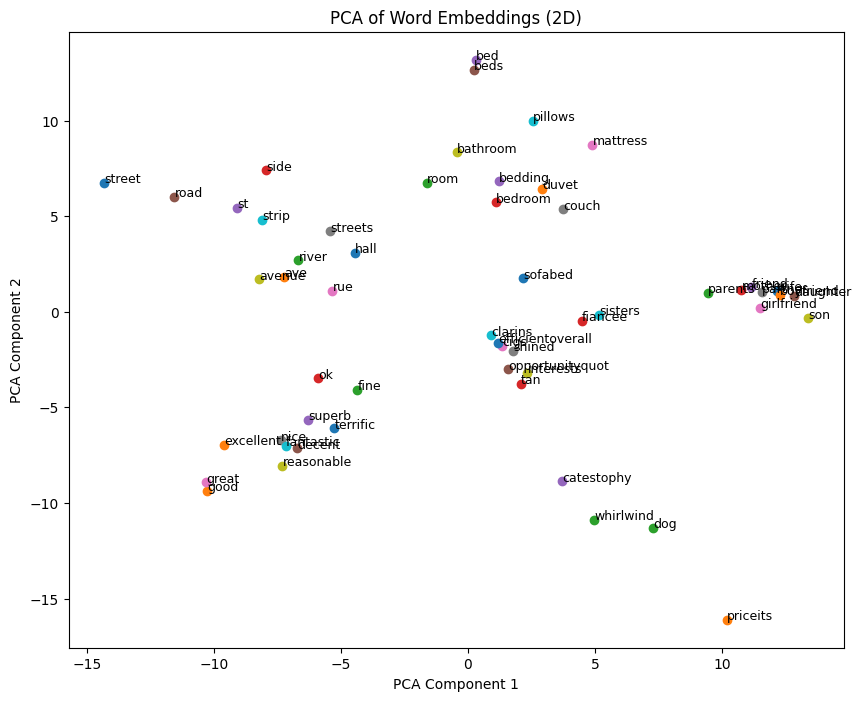

In [30]:
# Apply PCA to reduce the embeddings to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot the results
plt.figure(figsize=(10, 8))

for i, word in enumerate(all_words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.text(pca_result[i, 0] + 0.01, pca_result[i, 1] + 0.01, word, fontsize=9)

plt.title('PCA of Word Embeddings (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Resultados
- En la esquina inferior izquierda, se observa cómo todos los embeddings similares a la palabra ‘good’ están agrupados, y comparten un significado semántico similar. Por otro lado, los embeddings de las palabras similares a ‘dog’ están relativamente alejados del embedding de ‘dog’, debido a que estas palabras no guardan una relación semántica tan cercana entre sí. Sin embargo, el resto de palabras, como ‘clarins’, ‘shined’ y ‘efficientoverall’, sí mantienen una relación semántica más estrecha, lo que explica su proximidad. De igual manera, las palabras similares a ‘bed’ se encuentran agrupadas en la esquina superior derecha, mientras que las palabras similares a ‘street’ están en la esquina superior izquierda. Las palabras más cercanas entre sí son las más similares a ‘mother’, ya que comparten una relación semántica muy cercana.
